<a href="https://colab.research.google.com/github/ninayang2019/Machine-Learning/blob/master/eve_by_eve's_sales_Nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import modules and dataset





*   **Data preprocessing:** The data looks good, nearly no null values in sales data. Though I noticed that the sum of sales of the day Feburary 1st and  the day March 1st were not fully captured, as it is obvisoulsy lower than average level of monthly sales. I removed the sales data on March 1st to avoid a downsward prediction because of data entry error.
*   **Indexing with time seires data**: As there are aound 5000 data points that is hard to visualize the trend, I set the timestamps by days, and count the sum of the quantity as sales




## Data preprocessing

In [0]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df1 = pd.read_excel("data_eve.xlsx")
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 11 columns):
purchase-date       7134 non-null object
order-status        7134 non-null object
ASIN                7134 non-null object
item-status         7134 non-null object
quantity            7134 non-null int64
ship-city           7134 non-null object
ship-state          7134 non-null object
ship-postal-code    7134 non-null object
ship-country        7134 non-null object
Unnamed: 9          0 non-null float64
Unnamed: 10         7134 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 613.2+ KB


In [0]:
df1.isnull().sum()

purchase-date          0
order-status           0
ASIN                   0
item-status            0
quantity               0
ship-city              0
ship-state             0
ship-postal-code       0
ship-country           0
Unnamed: 9          7134
Unnamed: 10            0
dtype: int64

## Indexing with time series data

In [0]:
## As there are arounf 5000 data points, which would mess up the visualization. I am trying to group the data points by date.
## and set the index as date
df1 = df1.sort_values('purchase-date')
df1 = df1.groupby('purchase-date')['quantity'].sum().reset_index()
df1['purchase-date'] = pd.to_datetime(df1['purchase-date'])

In [0]:
df1 = df1.set_index('purchase-date')
df1.index

DatetimeIndex(['2018-02-01 08:51:41+00:00', '2018-02-01 11:31:16+00:00',
               '2018-02-01 11:52:25+00:00', '2018-02-01 12:06:40+00:00',
               '2018-02-01 12:34:39+00:00', '2018-02-01 12:47:07+00:00',
               '2018-02-01 12:48:02+00:00', '2018-02-01 12:53:39+00:00',
               '2018-02-01 12:55:18+00:00', '2018-02-01 13:06:27+00:00',
               ...
               '2018-02-28 23:18:41+00:00', '2018-02-28 23:19:11+00:00',
               '2018-02-28 23:25:35+00:00', '2018-02-28 23:26:16+00:00',
               '2018-02-28 23:38:10+00:00', '2018-02-28 23:40:23+00:00',
               '2018-02-28 23:49:28+00:00', '2018-02-28 23:51:08+00:00',
               '2018-02-28 23:52:08+00:00', '2018-02-28 23:58:44+00:00'],
              dtype='datetime64[ns, UTC]', name='purchase-date', length=5881, freq=None)

In [0]:
## Here is the data after cleaning
y = df1['quantity'].resample('D').sum()
y

purchase-date
2018-02-01 00:00:00+00:00     98
2018-02-02 00:00:00+00:00    225
2018-02-03 00:00:00+00:00    221
2018-02-04 00:00:00+00:00    285
2018-02-05 00:00:00+00:00    249
2018-02-06 00:00:00+00:00    259
2018-02-07 00:00:00+00:00    259
2018-02-08 00:00:00+00:00    260
2018-02-09 00:00:00+00:00    253
2018-02-10 00:00:00+00:00    267
2018-02-11 00:00:00+00:00    308
2018-02-12 00:00:00+00:00    276
2018-02-13 00:00:00+00:00    278
2018-02-14 00:00:00+00:00    247
2018-02-15 00:00:00+00:00    251
2018-02-16 00:00:00+00:00    225
2018-02-17 00:00:00+00:00    257
2018-02-18 00:00:00+00:00    270
2018-02-19 00:00:00+00:00    290
2018-02-20 00:00:00+00:00    249
2018-02-21 00:00:00+00:00    253
2018-02-22 00:00:00+00:00    284
2018-02-23 00:00:00+00:00    279
2018-02-24 00:00:00+00:00    338
2018-02-25 00:00:00+00:00    325
2018-02-26 00:00:00+00:00    294
2018-02-27 00:00:00+00:00    344
2018-02-28 00:00:00+00:00    304
Freq: D, Name: quantity, dtype: int64

# ARIMA time series prediction

In [0]:
#set parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

## Fitting the model

###  P value< 0.05, meaning refuse null hopothesis and accpet alternative hypothesis. This model is stationary now.
###  Run the model diagnosis,and there is no abnormal behavior of this model. 
### I think the model is good to go now.


In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0112      0.035     29.112      0.000       0.943       1.079
sigma2      1443.9935    285.099      5.065      0.000     885.210    2002.777


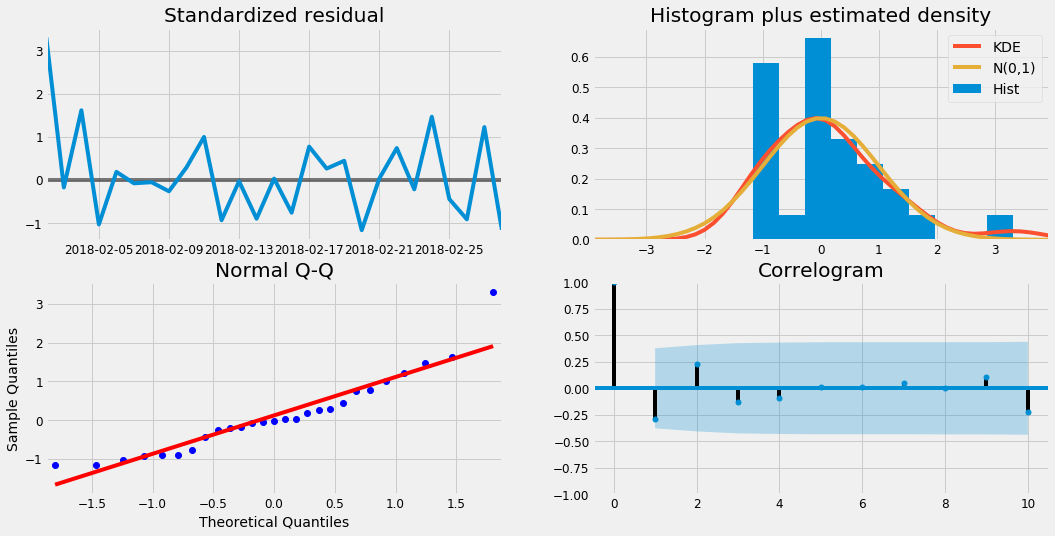

In [0]:
## Run model diagnosis to investigate unsual behavior
results.plot_diagnostics(figsize=(16, 8))
plt.show()
 From the behind graphs, I think we are good with current parameters.

##Validate model

###I am validating the forcast with data after 2018-02-15, it can be viewed that the predicted trend is perfectly matching with the actual(observed) trend. Meaning this model is quite accurate. Now we are good to run the prediction

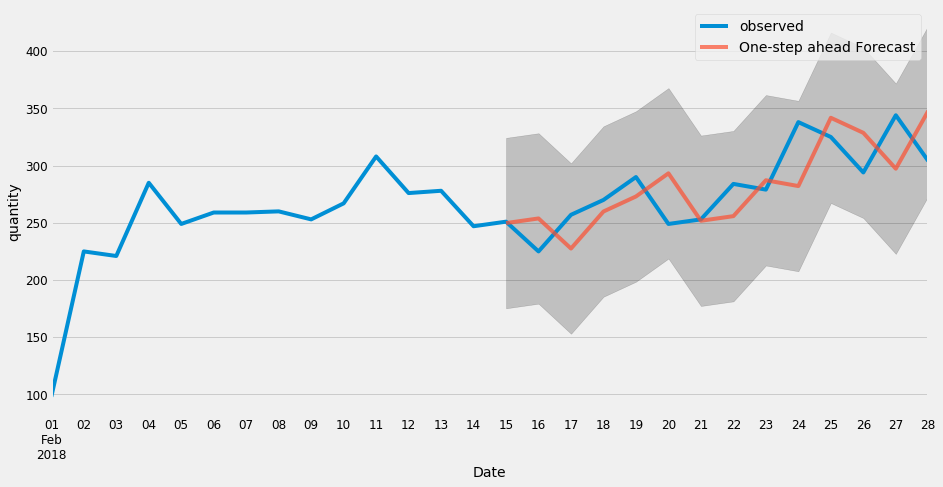

In [0]:
## Validating forcast
pred = results.get_prediction(start=pd.to_datetime('2018-02-15 00:00:00+00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('quantity')
plt.legend()
plt.show()

## Prediction and conclusion
### From the prediction, we can see teh sales is slightly going up.

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2018-02-01 00:00:00+00:00'), dynamic=False)
pred_ci = pred.conf_int()

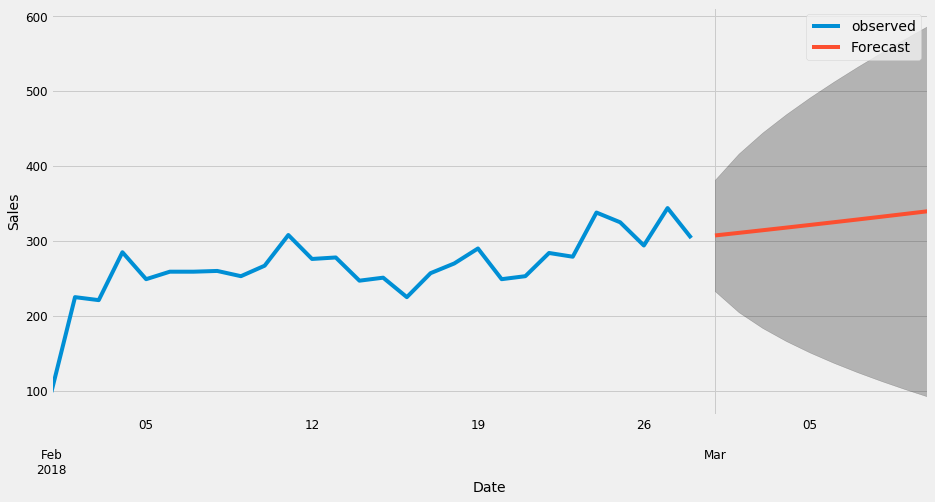

In [0]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Sales data visualization


##Analysis 1: 
###Now we have cleaned up the data, we can do little bit visualization on day's sales, and As it can be seen that there are aourng 4 peaks in Feb, which are relatively Feb 2nd,  9th, 16th, 23rd.( Which are all weekends in Feb)

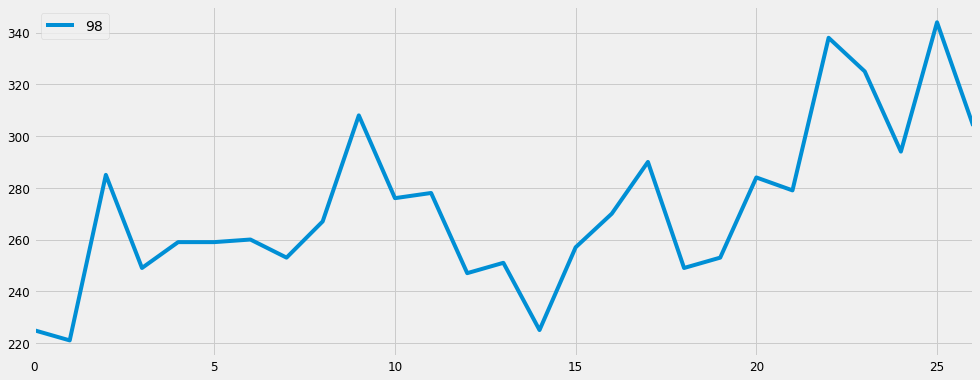

In [0]:
y.plot(figsize=(15, 6))
plt.show()

## Analysis 2:
### I did this visualization in Tableau as it's more intuitive to view.  Here is the sales data by region. Blue points are cities with 5 purchases or below. Yellow points are cities with 6 purchases or above. I don't really see a trend here as yellow points are usually located in big cities.


![alt text](https://pbs.twimg.com/media/D6P6yujUwAI2mlH?format=jpg&name=900x900)


##Analysis 3
###This the stock and sale count based on each product. 
![alt text](https://pbs.twimg.com/media/D6P6xq8U8AAnPCv?format=jpg&name=medium)

##Analysis 4 
###Though I am not able to visuliza all of them. I just set the filter to visulize the products where Sales>stocks. Here I got **9 products** that is demand?supply. There are:**BOOTWMCLGB, BOOTWMCM2G, BOOTWMCMOY, B01AVOK88S,B01AGDO, B01AVOKOCI,B01AVOKY6Y, B01POYSB6**
![alt text](https://pbs.twimg.com/media/D6P6u9VUEAEzbZi?format=jpg&name=900x900)